# **Libraries**

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    ElasticNet,
    SGDRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    mean_absolute_error, 
    mean_absolute_percentage_error, 
    mean_squared_error, 
    r2_score
)
from sklearn.pipeline import Pipeline


import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **Data**

In [2]:
df = pd.read_csv("./Walmart.csv")

# Formatting dataframe display
df.style.hide(axis="index")
df.style.format(precision=2)
df.style.background_gradient(subset=["Weekly_Sales"])
# cell_hover = {
#     "selector": "td:hover",
#     "props": [("background-color", "#FFFFE0")]
# }
# index_names = {
#     "selector": ".index_name",
#     "props": "font-style: italic; color: darkgrey; font-weight:normal;"
# }
# headers = {
#     "selector": "th:not(.index_name)",
#     "props": "background-color: #800000; color: white;"
# }
# df.style.set_table_styles([cell_hover, index_names, headers])

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.describe().style.background_gradient(cmap = 'YlGnBu')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# **Data Processing**

In [5]:
# Formatting date to be consistent
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", errors='coerce')

df['Day'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year

# Dropping the complete date as we have processed it to separate values
df.drop('Date', axis=1, inplace=True)

In [6]:
df.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,4,40,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,4,41,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012
6434,45,760281.43,0,58.85,3.882,192.308899,8.667,4,43,10,2012


In [7]:
df_train =  df[df['Year'] != 2012]
df_test_full_year =  df[df['Year'] == 2012]
df_test_six_months =  df_test_full_year[df_test_full_year['Month'] <= 6]
df_test_three_months =  df_test_full_year[df_test_full_year['Month'] <= 3]

print(f"# of samples in train {df_train.shape}")
print(f"# of samples in test for full year {df_test_full_year.shape}")
print(f"# of samples in test for six months {df_test_six_months.shape}")
print(f"# of samples in test for three months {df_test_three_months.shape}")

# of samples in train (4500, 11)
# of samples in test for full year (1935, 11)
# of samples in test for six months (1170, 11)
# of samples in test for three months (585, 11)


In [8]:
'''
df_train.Year.value_counts().plot(kind='bar')
df_test_full_year.Year.value_counts().plot(kind='bar')
df_test_six_months.Year.value_counts().plot(kind='bar')
df_test_three_months.Year.value_counts().plot(kind='bar')
'''

"\ndf_train.Year.value_counts().plot(kind='bar')\ndf_test_full_year.Year.value_counts().plot(kind='bar')\ndf_test_six_months.Year.value_counts().plot(kind='bar')\ndf_test_three_months.Year.value_counts().plot(kind='bar')\n"

In [9]:
print(df_train.tail().to_string(index=False))

 Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price        CPI  Unemployment  Day  Week  Month  Year
    45     875699.81             0        50.19       3.452 188.502435         8.523    4    48     12  2011
    45     957155.31             0        46.57       3.415 188.654469         8.523    4    49     12  2011
    45    1078905.68             0        39.93       3.413 188.797935         8.523    4    50     12  2011
    45    1521957.99             0        42.27       3.389 188.929975         8.523    4    51     12  2011
    45     869403.63             1        37.79       3.389 189.062016         8.523    4    52     12  2011


In [10]:
print(df_test_three_months.tail().to_string(index=False))

 Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price        CPI  Unemployment  Day  Week  Month  Year
    45     782796.01             0        41.55       3.816 190.171493         8.424    4     9      3  2012
    45     776968.87             0        45.52       3.848 190.335997         8.424    4    10      3  2012
    45     788340.23             0        50.56       3.862 190.461896         8.424    4    11      3  2012
    45     791835.37             0        59.45       3.900 190.536321         8.424    4    12      3  2012
    45     777254.06             0        50.04       3.953 190.610746         8.424    4    13      3  2012


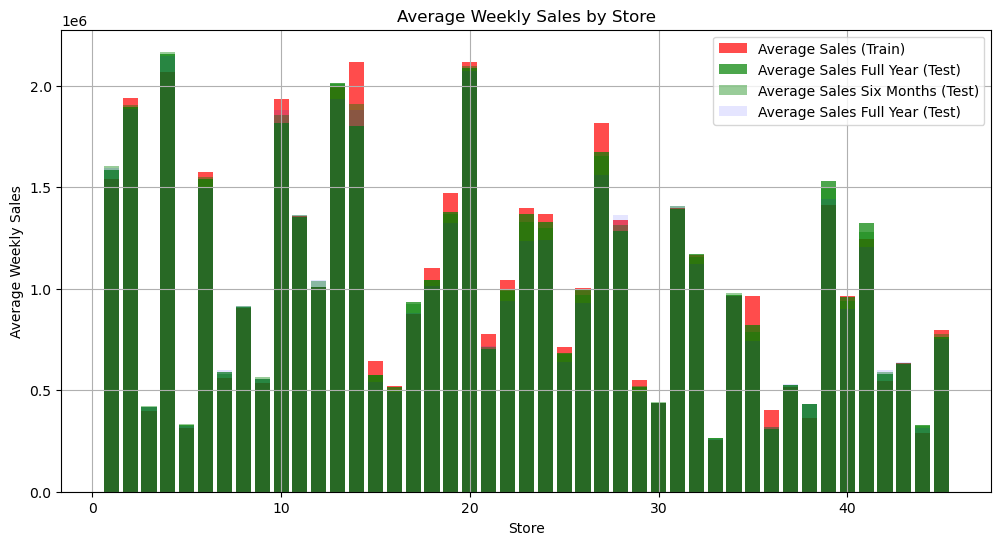

In [11]:
# Calculate average of weekly sales by store
train_avg_sales = df_train.groupby('Store')['Weekly_Sales'].mean()
test_avg_sales_full_year = df_test_full_year.groupby('Store')['Weekly_Sales'].mean()
test_avg_sales_six_months = df_test_six_months.groupby('Store')['Weekly_Sales'].mean()
test_avg_sales_three_months = df_test_three_months.groupby('Store')['Weekly_Sales'].mean()


# Plotting
plt.figure(figsize=(12, 6))
plt.bar(train_avg_sales.index, train_avg_sales.values, color='r', alpha=0.7, label='Average Sales (Train)')
plt.bar(test_avg_sales_full_year.index, test_avg_sales_full_year.values, color='g', alpha=0.7, label='Average Sales Full Year (Test)')
plt.bar(test_avg_sales_six_months.index, test_avg_sales_six_months.values, color='g', alpha=0.4, label='Average Sales Six Months (Test)')
plt.bar(test_avg_sales_three_months.index, test_avg_sales_three_months.values, color='b', alpha=0.1, label='Average Sales Full Year (Test)')

plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store')
plt.grid(True)
plt.legend()
plt.show()

# Data Exploration

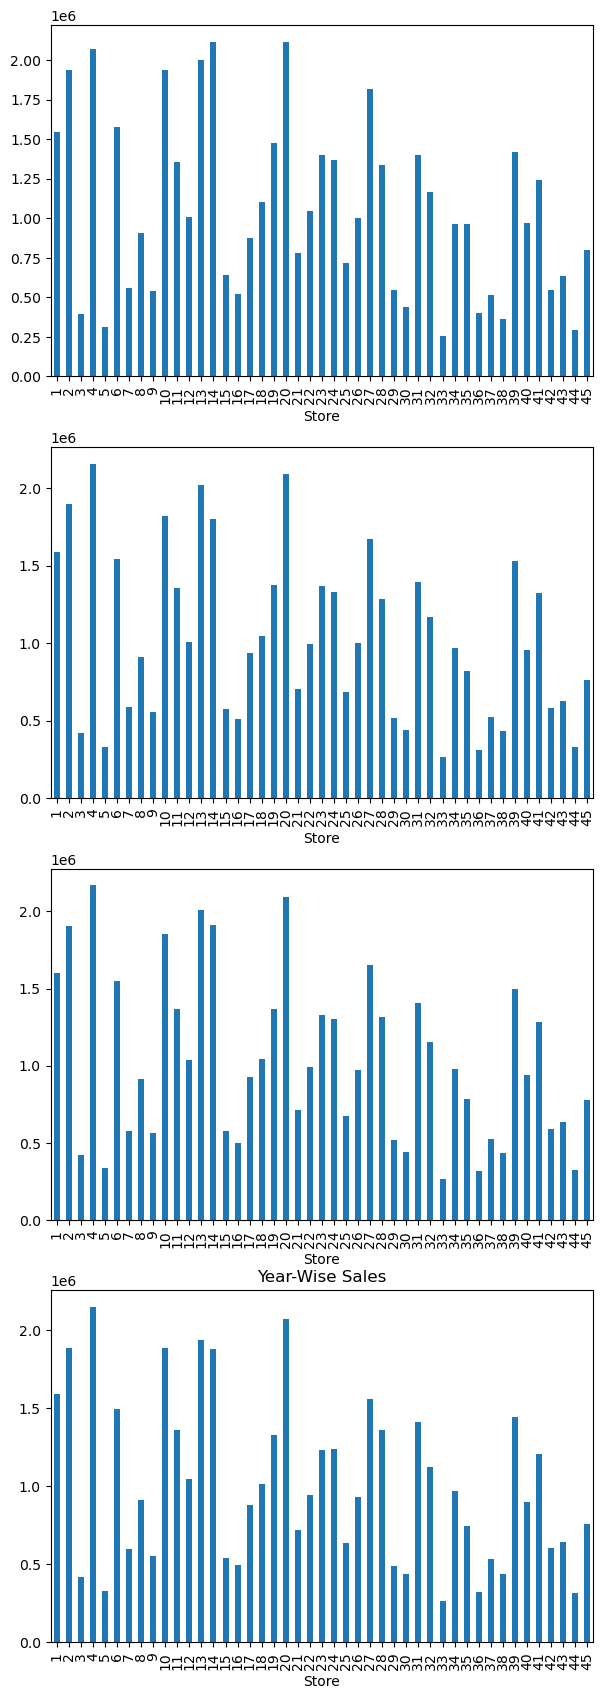

In [12]:
plt.figure(figsize=(7,21))

# Plot the weekly sales information in train and test data for each store as separate subplots
plt.subplot(4, 1, 1)
df_train.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')
plt.subplot(4, 1, 2)
df_test_full_year.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')
plt.subplot(4, 1, 3)
df_test_six_months.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')
plt.subplot(4, 1, 4)
df_test_three_months.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')
plt.title('Year-Wise Sales')

plt.show()

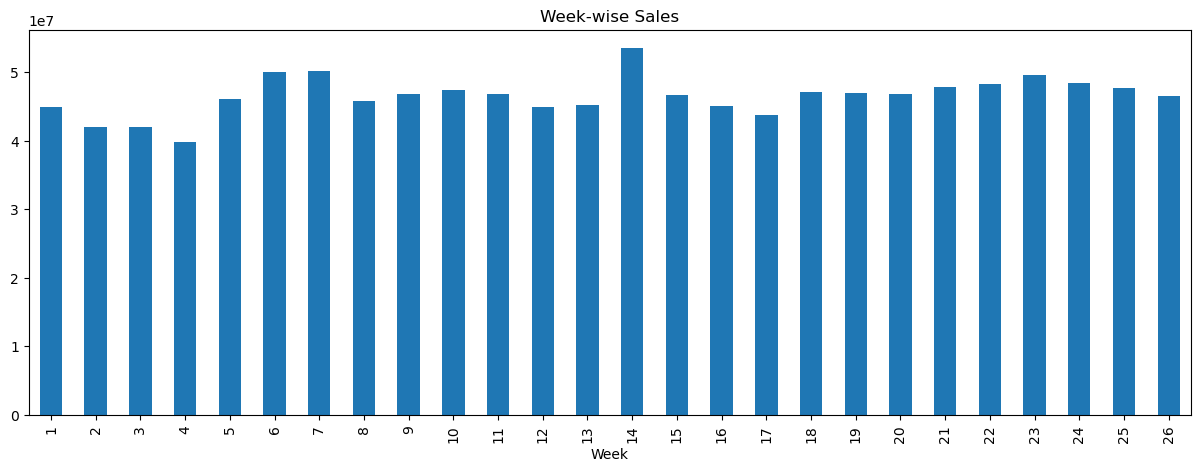

In [13]:
plt.figure(figsize=(15,5))

df_test_six_months.groupby(['Week'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Week-wise Sales')

plt.show()

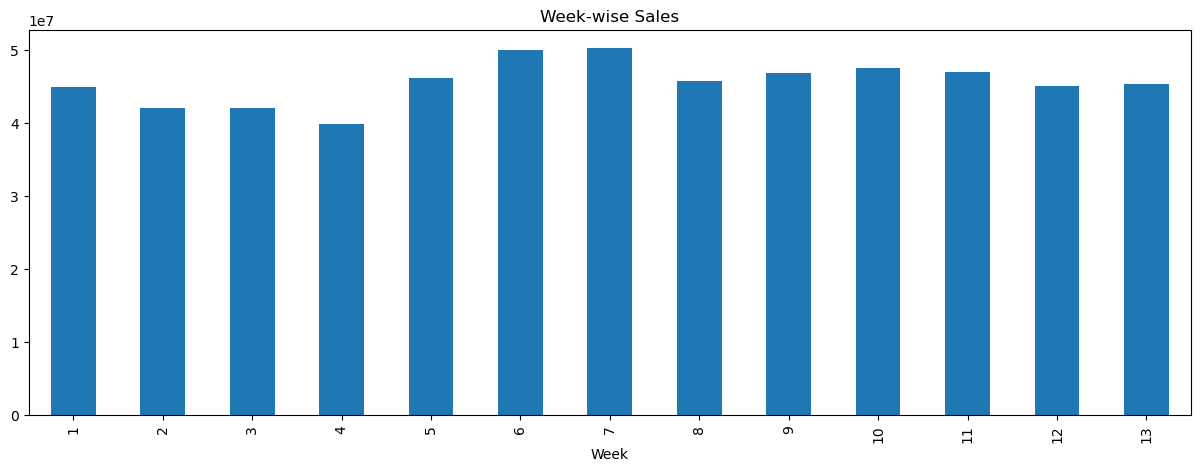

In [14]:
plt.figure(figsize=(15,5))

df_test_three_months.groupby(['Week'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Week-wise Sales')

plt.show()

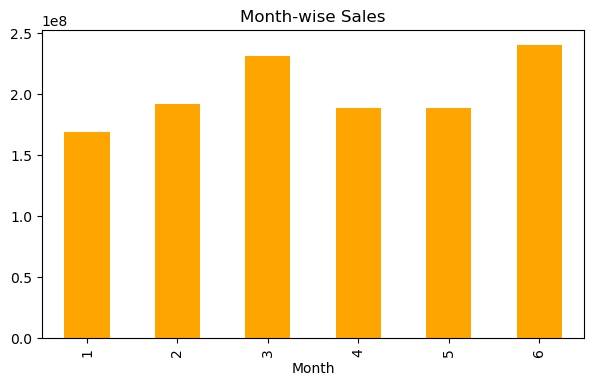

In [15]:
plt.figure(figsize=(7,4))

df_test_six_months.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar',color='Orange')
plt.title('Month-wise Sales')

plt.show()

# **Model Building**

In [16]:
x = df_train.drop(['Weekly_Sales'],axis=1)
y = df_train['Weekly_Sales']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Define the regression models to test
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    SGDRegressor()
]

In [18]:
# Create a pipeline for each regression model
pipelines = []
for model in regression_models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Preprocessing step
        ('regressor', model)  # Regression model
    ])
    pipelines.append(pipeline)

In [19]:
# Fit the pipelines to the training data and evaluate performance on testing data
results = []
for pipeline in pipelines:
    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_val)

    mae = mean_absolute_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    model_name = pipeline.named_steps['regressor'].__class__.__name__
    results.append({'Model': model_name, 'MSE': mse, 'R2 Score': r2, 'MAE': mae, 'MAPE': mape})

In [20]:
# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Sort the results DataFrame by R2 score in descending order
results_df = results_df.sort_values('R2 Score', ascending=False)
results_df

,Model,MSE,R2 Score,MAE,MAPE
4,RandomForestRegressor,1.255141e+10,0.960728,63498.116374,0.059617
5,DecisionTreeRegressor,1.610879e+10,0.949597,72851.296389,0.068638
7,GradientBoostingRegressor,3.209303e+10,0.899585,133911.111513,0.169986
6,KNeighborsRegressor,1.353216e+11,0.576594,246846.973416,0.328808
0,LinearRegression,2.701550e+11,0.154716,431989.691682,0.619103
2,Lasso,2.701558e+11,0.154714,431989.654088,0.619105
1,Ridge,2.701659e+11,0.154682,431990.555170,0.619131
8,SGDRegressor,2.703875e+11,0.153989,432059.098487,0.619801
3,ElasticNet,2.769062e+11,0.133592,441098.524352,0.634853


In [21]:
x_test_full_year = df_test_full_year.drop(['Weekly_Sales'],axis=1)
y_test_full_year = df_test_full_year['Weekly_Sales']

x_test_six_months = df_test_six_months.drop(['Weekly_Sales'],axis=1)
y_test_six_months = df_test_six_months['Weekly_Sales']

x_test_three_months = df_test_three_months.drop(['Weekly_Sales'],axis=1)
y_test_three_months = df_test_three_months['Weekly_Sales']

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('regressor', RandomForestRegressor())  # Chosen regression model
])

pipeline.fit(x_train, y_train)

y_pred_full_year = pipeline.predict(x_test_full_year)
y_pred_six_months = pipeline.predict(x_test_six_months)
y_pred_three_months = pipeline.predict(x_test_three_months)

mae_full_year = mean_absolute_error(y_test_full_year, y_pred_full_year)
mae_six_months = mean_absolute_error(y_test_six_months, y_pred_six_months)
mae_three_months = mean_absolute_error(y_test_three_months, y_pred_three_months)

mape_full_year = mean_absolute_percentage_error(y_test_full_year, y_pred_full_year)
mape_six_months = mean_absolute_percentage_error(y_test_six_months, y_pred_six_months)
mape_three_months = mean_absolute_percentage_error(y_test_three_months, y_pred_three_months)

mse_full_year = mean_squared_error(y_test_full_year, y_pred_full_year)
mse_six_months = mean_squared_error(y_test_six_months, y_pred_six_months)
mse_three_months = mean_squared_error(y_test_three_months, y_pred_three_months)

r2_full_year = r2_score(y_test_full_year, y_pred_full_year)
r2_six_months = r2_score(y_test_six_months, y_pred_six_months)
r2_three_months = r2_score(y_test_three_months, y_pred_three_months)

model_name = pipeline.named_steps['regressor'].__class__.__name__

print(f"Whole Year 'Model': {model_name}, 'MSE': {mse_full_year}, 'R2 Score': {r2_full_year}, 'MAE': {mae_full_year}, 'MAPE': {mape_full_year}")
print(f"Six Months 'Model': {model_name}, 'MSE': {mse_six_months}, 'R2 Score': {r2_six_months}, 'MAE': {mae_six_months}, 'MAPE': {mape_six_months}")
print(f"Three Months 'Model': {model_name}, 'MSE': {mse_three_months}, 'R2 Score': {r2_three_months}, 'MAE': {mae_three_months}, 'MAPE': {mape_three_months}")

Whole Year 'Model': RandomForestRegressor, 'MSE': 72312746096.52078, 'R2 Score': 0.7487815723158484, 'MAE': 149886.63319209305, 'MAPE': 0.15203111864101013
Six Months 'Model': RandomForestRegressor, 'MSE': 66542952677.089676, 'R2 Score': 0.7728433307425208, 'MAE': 139110.6284223077, 'MAPE': 0.13885253418080293
Three Months 'Model': RandomForestRegressor, 'MSE': 57079762952.93036, 'R2 Score': 0.7985634978327771, 'MAE': 128756.55060478627, 'MAPE': 0.13014213419830084


In [24]:
df_test_full_year['Weekly_Sales_Pred'] = list(y_pred_full_year)
df_test_full_year.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year,Weekly_Sales_Pred
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,4,1,1,2012,1.647373e+06
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,4,2,1,2012,1.648682e+06
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,4,3,1,2012,1.674072e+06
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,4,4,1,2012,1.683125e+06
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,4,5,2,2012,1.739512e+06


In [25]:
df_test_six_months['Weekly_Sales_Pred'] = list(y_pred_six_months)
df_test_six_months.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year,Weekly_Sales_Pred
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,4,1,1,2012,1.647373e+06
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,4,2,1,2012,1.648682e+06
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,4,3,1,2012,1.674072e+06
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,4,4,1,2012,1.683125e+06
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,4,5,2,2012,1.739512e+06


In [26]:
df_test_three_months['Weekly_Sales_Pred'] = list(y_pred_three_months)
df_test_three_months.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year,Weekly_Sales_Pred
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,4,1,1,2012,1.647373e+06
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,4,2,1,2012,1.648682e+06
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,4,3,1,2012,1.674072e+06
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,4,4,1,2012,1.683125e+06
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,4,5,2,2012,1.739512e+06
